## Сборный проект

Интернет-магазине «Стримчик» - магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, ​Xbox​ или ​PlayStation​). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.Перед нами данные до 2016 года. Представим, что сейчас декабрь2016 г., и мы планируете кампанию на 2017-й. 
​ESRB (Entertainment Software Rating Board)​ — это ассоциация, определяющая возрастнойрейтинг компьютерных игр. 

### Шаг 1. Изучу данные

Описание данных:
- Name​ — название игры
- Platform​ — платформа
- Year_of_Release​ — год выпуска
- Genre​ — жанр игры
- NA_sales —​ продажи в Северной Америке (миллионы долларов)
- EU_sales​ — продажи в Европе (миллионы долларов)
- JP_sales​ — продажи в Японии (миллионы долларов)
- Other_sales —​ продажи в других странах (миллионы долларов)
- Critic_Score​ — оценка критиков (максимум 100)
- User_Score​ — оценка пользователей (максимум 10)
- Rating​ — рейтинг от организации ​ESRB​ (англ. ​EntertainmentSoftware Rating Board).
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

In [2]:
# Подключаю библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import datetime
from functools import reduce
from scipy import stats as st


In [3]:
games = pd.read_csv('/datasets/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Шаг 2. Подготовка данных

In [4]:
#Заменяю названия столбцов, привожу к нижнему регистру
games.columns = map(str.lower, games.columns)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего в таблице 11 столбцов, содержащих 16715 записей. 6 столбцов имеют тип данных float64, остальные 5 столцов имеют тип данных object. 

In [5]:
#Преобразую данные в нужные типы. В столбце year_of_release формат меняю на целочисленный
games.loc[games['year_of_release'].notnull(), 'year_of_release'] = games.loc[games['year_of_release'].notnull(), 'year_of_release'].apply(int)
games['year_of_release'] = games['year_of_release'].astype('Int64')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
#Обрабатываю пропуски
games.loc[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
games['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [8]:
games.loc[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000,  NaN, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [10]:
games.loc[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
#Проверяю надичие пропусков в столбце critic_score (Оценка критиков, макс.100)
games.loc[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Пропуски в оценке критиков оставлю без изменений. Критики выставляют оценки в момент выхода игры. Значит, эта информация отсутствует в этих данных.

In [13]:
#Проверяю надичие пропусков в столбце user_score (Оценка пользователей, макс.10)
games.loc[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.5       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Большое количество оценок tbd = to be determined. Заменю эти значения пустыми.

In [15]:
#Заменю значения в столбце user_score
games.loc[games['user_score'] == 'tbd', 'user_score'] = ''
games['user_score'] = pd.to_numeric(games['user_score'])

In [16]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [17]:
#Проверяю наличие пропусков в столбце rating
games.loc[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [19]:
games.loc[games['rating'] == 'E', 'rating'] = 6
games.loc[games['rating'] == 'M', 'rating'] = 17
games.loc[games['rating'] == 'T', 'rating'] = 13
games.loc[games['rating'] == 'E10+', 'rating'] = 10
games.loc[games['rating'] == 'K-A', 'rating'] = 6
games.loc[games['rating'] == 'AO', 'rating'] = 18
games.loc[games['rating'] == 'EC', 'rating'] = 3
games.loc[games['rating'] == 'RP', 'rating'] = ''
games['rating'] = pd.to_numeric(games['user_score'])

Пропуски в рейтинге также оставлю без изменений. Здесь трудно их как-то заменить. На сколько я знаю, рейтинг организации выставляют в момент выхода игры.

Пропуски в данных скорее всего случайные. Пропущены данные в столбцах name, year_of_release, genre, critic_score, user_score, rating. По всей видимости оценки были не выставлены критиками и пользователями различным играм.
И еще 2 пропуска в столбцах name и genre. Эти строки удалю, так как они занимают крайне малую часть таблицы и не повлияют на анализ данных.

In [20]:
#Удаляю 2 строчки с пропущенными данными в названии и жанра игры
games.dropna(subset = ['name', 'genre'], inplace = True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             7590 non-null float64
dtypes: Int64(1), float64(7), object(3)
memory usage: 1.5+ MB


In [21]:
#Добавлю столбец с суммарным доходом
games['all_revenue'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### Шаг 3. Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

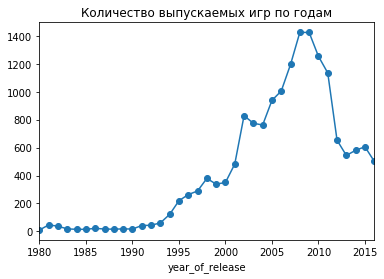

In [22]:
games_year = games.groupby('year_of_release')['na_sales'].count()
games_year.plot(title = 'Количество выпускаемых игр по годам', style='o-')

Из этого графика видно, что в период 1980-1992 гг. количество продаваемых игр было минимальным. Из данных этого графика я бы оставила только данные за период 2000-2015 гг. Но посмотрим чуть более детально.

#### Посмотрю, как менялись продажи по платформам. 

In [23]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [24]:
#Суммарные продажи по регионам и какие игры на каких платформах принесли наибольший суммарный доход
platform_revenue = games.groupby('platform')['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_revenue'].sum()
top5_platform_data = games.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS"').pivot_table(index=['platform'], columns='year_of_release', values='all_revenue', aggfunc='sum')
platform_revenue.sort_values('all_revenue', ascending=False).head() 

,na_sales,eu_sales,jp_sales,other_sales,all_revenue
platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.77
X360,602.47,270.76,12.43,85.76,971.42
PS3,393.49,330.29,80.19,135.68,939.65
Wii,496.90,262.21,69.33,79.07,907.51
DS,382.40,188.89,175.57,59.26,806.12


In [25]:
#Топ-5 платформ по суммарному доходу
top5_revenue = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

По суммарным продажам лидируют платформы: 'PS2', 'X360', 'PS3', 'Wii', 'DS'

In [26]:
top5_platform_data

year_of_release,1985,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,
DS,0.02,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PS2,NaN,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,NaN,NaN,NaN,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


In [27]:
plt.style.use('seaborn-colorblind')

(-5, 250)

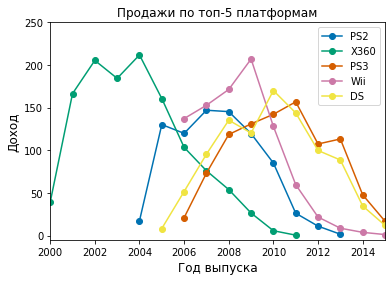

In [28]:
top5_platform_data_plot = games.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS"').pivot_table(index=['year_of_release'], columns='platform', values='all_revenue', aggfunc='sum')

top5_platform_data_plot.plot(title= 'Продажи по топ-5 платформам', style='o-')
plt.xlabel("Год выпуска", fontsize=12)  
plt.ylabel("Доход", fontsize=12)
labels= ['PS2', 'X360', 'PS3', 'Wii', 'DS']
plt.legend(labels)
plt.xlim(2000, 2015)
plt.ylim(-5, 250)

Среди всех платформ наблюдается заметный рост продаж на определенный период, и такой же быстрый спад. 
За 3-4 повявляются новые платформы и пропадают старые. 
Актуальным следует выбрать тот период, когда продажи по платформе были на взлете, половина ее срока жизни.
Соответственно актуальным периодом выбираю 2011-2015 гг.

(-0.2, 2)

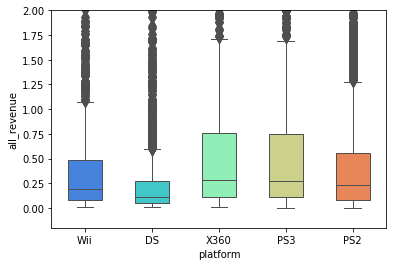

In [29]:
top5_boxplot = games.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS"') 
sns.boxplot(x='platform', y="all_revenue", data=top5_boxplot, palette='rainbow', linewidth=1, width=0.5, fliersize=10).set_ylim([-0.2, 2])



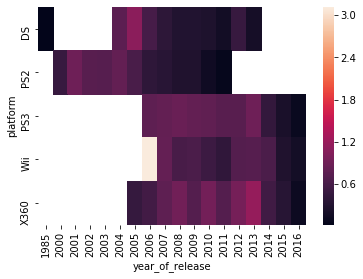

In [30]:
top5_platform_heatmap = top5_boxplot.pivot_table(values='all_revenue', index='platform', columns='year_of_release')
sns.heatmap(top5_platform_heatmap)

Я выбрала актуальный период 2011-2015 гг. Построю дальнейший анализ на данный за эти годы.

In [31]:
#Построю распределения объемов продаж за актуальный период. 
year_games_data = games.query('year_of_release == 2011 or year_of_release == 2012 or year_of_release == 2013 or year_of_release == 2014 or year_of_release == 2015')
year_games_data_pivot = year_games_data.pivot_table(index=['year_of_release'], columns='platform', values='all_revenue', aggfunc='sum')

(-5, 180)

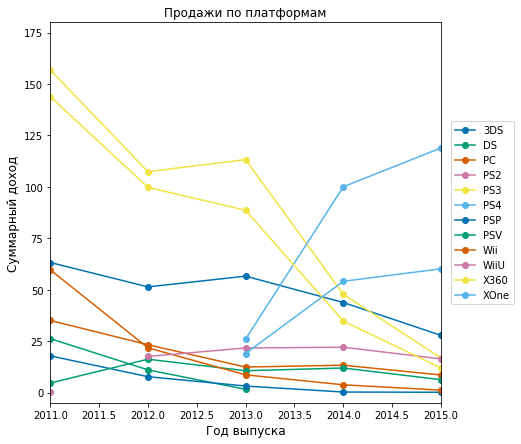

In [32]:
year_games_data_pivot.plot(title= 'Продажи по платформам', style='o-', figsize=(7, 7))
plt.xlabel("Год выпуска", fontsize=12)  
plt.ylabel("Суммарный доход", fontsize=12)
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.xlim(2011, 2015)
plt.ylim(-5, 180)

Продажи по платформам XOne и PS4 заметно растут, по всем остальным платформам продажи либо почти на одном уровне, либо снижаются.

In [33]:
#Посмотрю распределение по продажам каждой игры и разбивкой по платформам
games_name = games.query('year_of_release == 2011 or year_of_release == 2012 or year_of_release == 2013 or year_of_release == 2014 or year_of_release == 2015').groupby(['name', 'platform'])['all_revenue'].sum()
games_name.columns = ['platform', 'all_revenue']
games_name.to_frame().sort_values(by = 'all_revenue', ascending=False).head(10)

all_revenue
name                           platform             
Grand Theft Auto V             PS3             21.05
                               X360            16.27
Call of Duty: Modern Warfare 3 X360            14.73
Call of Duty: Black Ops 3      PS4             14.63
Pokemon X/Pokemon Y            3DS             14.60
Call of Duty: Black Ops II     PS3             13.79
                               X360            13.68
Call of Duty: Modern Warfare 3 PS3             13.33
Mario Kart 7                   3DS             12.65
Grand Theft Auto V             PS4             12.62

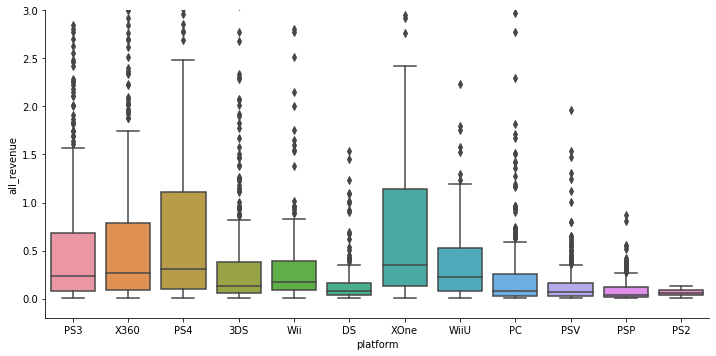

In [34]:
sns.catplot(x='platform', y='all_revenue', data = year_games_data, kind="box", height=5, aspect=2).set(ylim=(-0.2, 3))

По средним глобальным продажам выделяются платформы: PS4, XOne, X360, PS3 

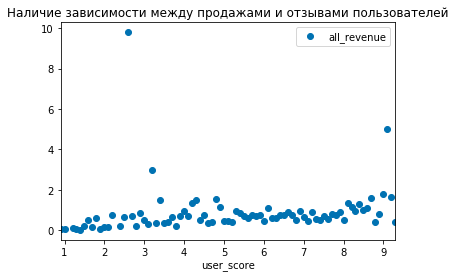

In [35]:
#Проверяю наличие зависимости между продажами и отзывами пользователей
games_user_score = year_games_data.pivot_table(index = 'user_score', values = 'all_revenue')
games_user_score.sort_values('user_score').plot(title='Наличие зависимости между продажами и отзывами пользователей', style='o')

In [36]:
games['user_score'].corr(games['all_revenue'])

0.08817911987579136

Это значение говорит о том, что взаимосвязи между оценкой пользователя и продажами нет. При изменении одной величины другая остаётся прежней.

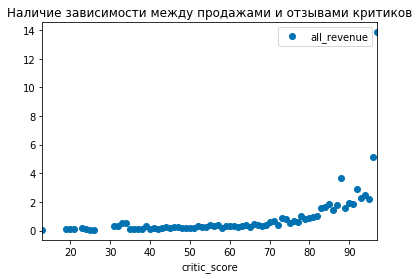

In [37]:
#Проверяю наличие зависимости между продажами и отзывами критиков
games_critic_score = year_games_data.pivot_table(index = 'critic_score', values = 'all_revenue')
games_critic_score.sort_values('critic_score').plot(title='Наличие зависимости между продажами и отзывами критиков', style='o')

In [38]:
games['critic_score'].corr(games['all_revenue'])

0.24550668717736324

Взаимосвзязь между этими двумя параметрами также слабая.
Получается, что ни от оценки пользователей, ни от оценки критиков объем продаж игр почти не зависят.

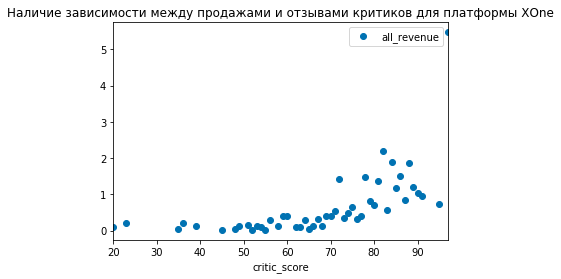

In [39]:
#Рассмотрю на примере платформы XOne
XOne = games.query('platform == "XOne"')
games_xone = games.query('platform == "XOne"').pivot_table(index = 'critic_score', values = 'all_revenue')
games_xone.sort_values('critic_score').plot(title='Наличие зависимости между продажами и отзывами критиков для платформы XOne', style='o')

In [40]:
XOne['critic_score'].corr(XOne['all_revenue'])

0.4169983280084017

Корреляция в 0,42 говорит о наличии связи, однако не слишком сильной. 
Выходит, увеличение критиков сопровождается прибавкой доходах, но так бывает не всегда.

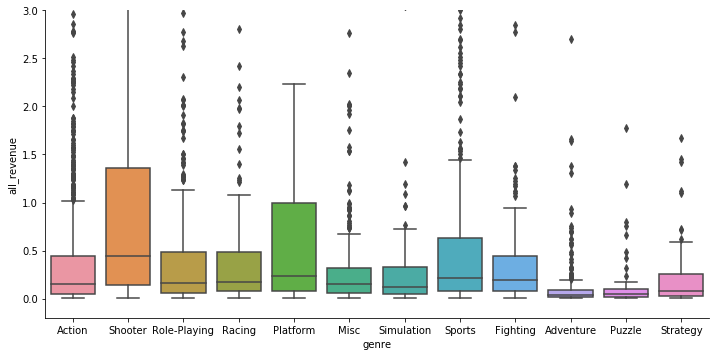

In [41]:
#Построю распределение игр по жанрам
sns.catplot(x='genre', y='all_revenue', data = year_games_data, kind="box", height=5, aspect=2).set(ylim=(-0.2, 3))

Получается, что прибыльность от жанра вообще не зависит. Выбивается по значению только жанр Shooter.

### Шаг 4. Портрет пользователя каждого региона

In [42]:
games_region = games.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()
games_region.sort_values(by = 'na_sales', ascending=False).head()

,na_sales,eu_sales,jp_sales
platform,,,
X360,602.47,270.76,12.43
PS2,583.84,339.29,139.20
Wii,496.90,262.21,69.33
PS3,393.49,330.29,80.19
DS,382.40,188.89,175.57


In [43]:
games_region.sort_values(by = 'eu_sales', ascending=False).head()

,na_sales,eu_sales,jp_sales
platform,,,
PS2,583.84,339.29,139.20
PS3,393.49,330.29,80.19
X360,602.47,270.76,12.43
Wii,496.90,262.21,69.33
PS,336.52,213.61,139.82


In [44]:
games_region.sort_values(by = 'jp_sales', ascending=False).head()

,na_sales,eu_sales,jp_sales
platform,,,
DS,382.40,188.89,175.57
PS,336.52,213.61,139.82
PS2,583.84,339.29,139.20
SNES,61.23,19.04,116.55
3DS,83.49,61.48,100.67


In [45]:
#по жанрам
genre_region = games.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()
genre_region.sort_values(by = 'na_sales', ascending=False).head()

,na_sales,eu_sales,jp_sales
genre,,,
Action,879.01,519.13,161.43
Sports,684.43,376.79,135.54
Shooter,592.24,317.34,38.76
Platform,445.50,200.35,130.83
Misc,407.27,212.74,108.11


In [46]:
genre_region.sort_values(by = 'eu_sales', ascending=False).head()

,na_sales,eu_sales,jp_sales
genre,,,
Action,879.01,519.13,161.43
Sports,684.43,376.79,135.54
Shooter,592.24,317.34,38.76
Racing,359.35,236.51,56.71
Misc,407.27,212.74,108.11


In [47]:
genre_region.sort_values(by = 'jp_sales', ascending=False).head()

,na_sales,eu_sales,jp_sales
genre,,,
Role-Playing,330.81,188.71,355.41
Action,879.01,519.13,161.43
Sports,684.43,376.79,135.54
Platform,445.50,200.35,130.83
Misc,407.27,212.74,108.11


PS2, PS, DS, Wii - самые популярные платформы во всех регионах.
Среди жанров лидерами являются Action, Sports и Platform. 

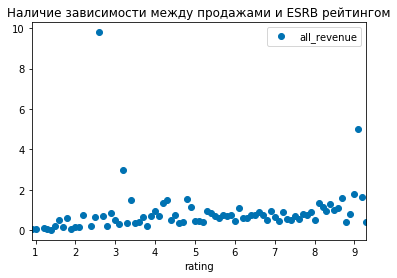

In [48]:
games_ESRB = year_games_data.pivot_table(index = 'rating', values = 'all_revenue')
games_ESRB.sort_values('rating').plot(title='Наличие зависимости между продажами и ESRB рейтингом', style='o')

In [49]:
year_games_data['rating'].corr(year_games_data['all_revenue'])

0.03917346688826674

Получается, что между продажами и ESRB рейтингом нет взаимосвязи. 

### Шаг 5. Проверю гипотезы

- Средние пользовательские рейтинги платформ ​Xbox One​ и ​PC одинаковые;
- Средние пользовательские рейтинги жанров ​Action​ (англ.«действие», экшен-игры) и ​Sports​ (англ. «спортивные соревнования») разные.

#### Проверяю гипотезу: средние пользовательские рейтинги платформ ​Xbox One​ и ​PC одинаковые

In [50]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [51]:
Games_XOne = year_games_data.query('platform == "XOne"')
Games_XOne = Games_XOne.groupby('year_of_release')['user_score'].mean()

Games_PC = year_games_data.query('platform == "PC"')
Games_PC = Games_PC.groupby('year_of_release')['user_score'].mean()

alpha = .05 
results = st.ttest_ind(
    Games_XOne, 
    Games_PC)  

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.7396262916561916
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские рейтинги платформ ​Xbox One​ и ​PC одинаковые. Гипотеза подтвердилась.

#### Проверяю гипотезу: средние пользовательские рейтинги жанров ​Action​ (англ.«действие», экшен-игры) и ​Sports​ (англ. «спортивные соревнования») разные

In [52]:
Games_action = year_games_data.query('genre == "Action"')
Games_action = Games_action.groupby('year_of_release')['user_score'].mean()

Games_sports = year_games_data.query('genre == "Action"')
Games_sports = Games_sports.groupby('year_of_release')['user_score'].mean()

alpha = .05 
results = st.ttest_ind(
    Games_action, 
    Games_sports)  

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские рейтинги жанров ​Action​ (англ.«действие», экшен-игры) и ​Sports​ (англ. «спортивные соревнования») разные. Гипотеза потдвердилась.

### Шаг 6. Общий вывод

В этом задании нужно было спланировать кампанию по продаже компьютерных игр на 2017-й год.

Исходные данные содержали сведения о продажах игр за предыдущие годы. 
Входные данные содержались в одной таблице (11 столбцов, 16715 записей). 
Была проведена предобработка данных: обработка пропусков, удаление некорректных значений, замена значений. Посчитала и добавила в таблицу дополнительные параметры. Сделала сводную таблицу со всеми необходимыми данными. 

При детальном анализе данных получила следующие результаты:
- в период 1980-1992 гг. количество продаваемых игр было минимальным; 
- по суммарным продажам за все годы лидируют платформы: 'PS2', 'X360', 'PS3', 'Wii', 'DS'.
- Среди всех платформ наблюдается заметный рост продаж на определенный период, и такой же быстрый спад. 
За 3-4 повявляются новые платформы и пропадают старые. 
Актуальным следует я выбрала тот период, когда продажи по платформе были на взлете, половина ее срока жизни.
Соответственно актуальным периодом выбирала 2011-2015 гг.
- По средним глобальным продажам в актуальный период выделяются платформы: PS4, XOne, X360, PS3.
- Ни от оценки пользователей, ни от оценки критиков объем продаж игр почти не зависят. При изменении одной величины другая остаётся прежней.
- Также получилось, что прибыльность от жанра вообще не зависит. Выбивается по значению только жанр Shooter.
- X360, PS2, PS, DS, Wii - самые популярные платформы во всех регионах.
- Среди жанров лидерами являются Action, Sports и Platform.
- Получилось, что между продажами и ESRB рейтингом нет взаимосвязи.

Провела статистический анализ и проверку двух гипотез, обе гипотезы подтвердились:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
2. Средние пользовательские рейтинги жанров Action (англ.«действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Получается в на следующий год следует сделать акцент на развитии продаж игр: PS4, XOne, X360.